In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")


titanic_data.drop(['PassengerId', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data.dropna(subset=['Fare'], inplace=True)
titanic_data['Cabin'] = titanic_data['Cabin'].str[:1]
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Cabin'] = label_encoder.fit_transform(titanic_data['Cabin'])
titanic_data['Title'] = label_encoder.fit_transform(titanic_data['Title'])

titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

In [11]:
X = titanic_data.drop(['Survived', 'Name'], axis=1)
y = titanic_data['Survived']


numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

In [4]:
for key in classification_rep.keys():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        classification_rep[key]['precision'] = f"{classification_rep[key]['precision']*100:.1f}%"
        classification_rep[key]['recall'] = f"{classification_rep[key]['recall']*100:.1f}%"
        classification_rep[key]['f1-score'] = f"{classification_rep[key]['f1-score']*100:.1f}%"

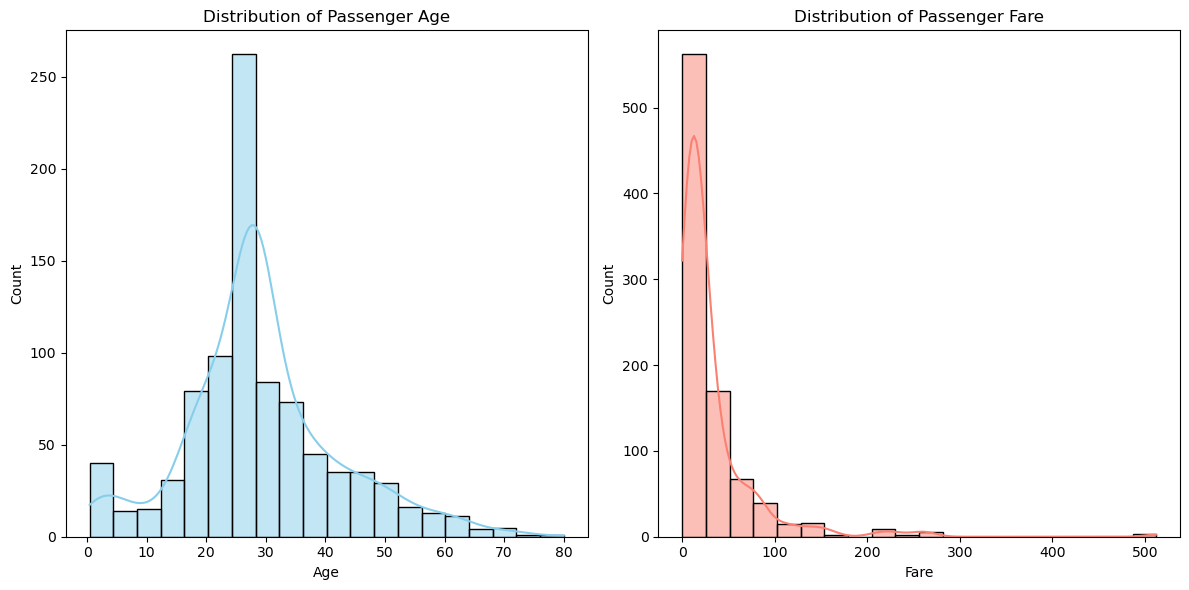

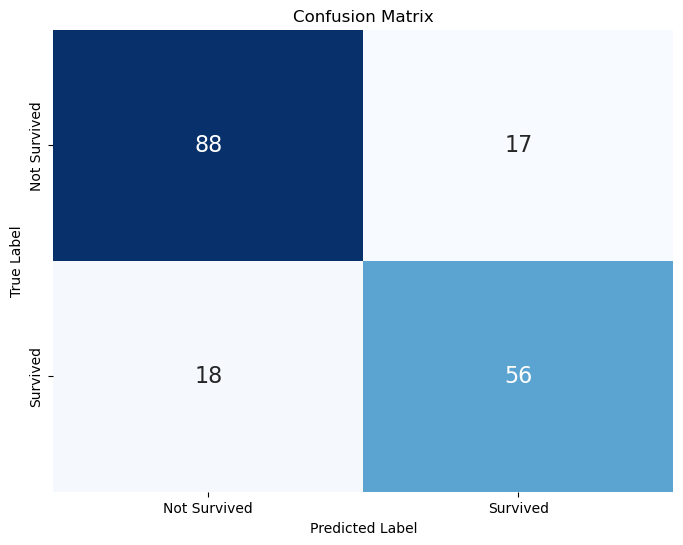

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Fare'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Survived', 'Survived'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Survived', 'Survived'])
plt.show()

In [14]:
print("Titanic Classification System")
print("-" * 30)
print("Model Performance:")
print(f"Accuracy: {accuracy*100:.1f}%")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived']))
print("\nClassification Report:")
print(pd.DataFrame(classification_rep).transpose())
print("\n0: Not Survived\n1: Survived")

Titanic Classification System
------------------------------
Model Performance:
Accuracy: 80.4%

Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      88                  17
Actual Survived                          18                  56

Classification Report:
              precision    recall  f1-score     support
0              0.830189  0.838095  0.834123  105.000000
1              0.767123  0.756757  0.761905   74.000000
accuracy       0.804469  0.804469  0.804469    0.804469
macro avg      0.798656  0.797426  0.798014  179.000000
weighted avg   0.804117  0.804469  0.804268  179.000000

0: Not Survived
1: Survived
